## STOCK PRICE PREDICTION

Predicting the stock market has been the bane and goal of investors since its
inception. Every day billions of dollars are traded on the stock exchange, and behind
every dollar is an investor hoping to make a profit in one way or another. Here, challenge is to build a predictive model that can predict stock prices.

In [2]:
%pip install seaborn
%pip install statsmodels

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

<ipython-input-3-51f7f2418e18>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
df = pd.read_csv("INR=X.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [5]:
print(df.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2020-01-27  71.320000  71.635002  71.320000  71.324997  71.324997       0
1  2020-01-28  71.654999  71.654999  71.178001  71.440002  71.440002       0
2  2020-01-29  71.230103  71.425003  71.168503  71.230400  71.230400       0
3  2020-01-30  71.300003  71.711998  71.300003  71.300003  71.300003       0
4  2020-01-31  71.639999  71.639999  71.277496  71.639999  71.639999       0


In [6]:
print(df.shape)

(262, 7)


In [7]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


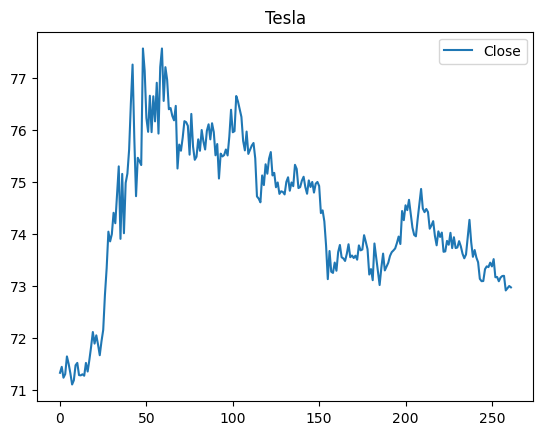

In [8]:
df[['Close']].plot()
plt.title("Tesla")
plt.show()

Text(0.5, 1.0, 'Tesla Cumulative Returns')

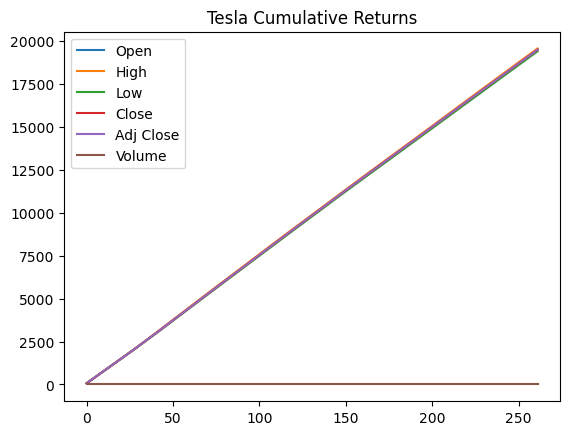

In [9]:
dr = df.cumsum()
dr.plot()
plt.title('Tesla Cumulative Returns')

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

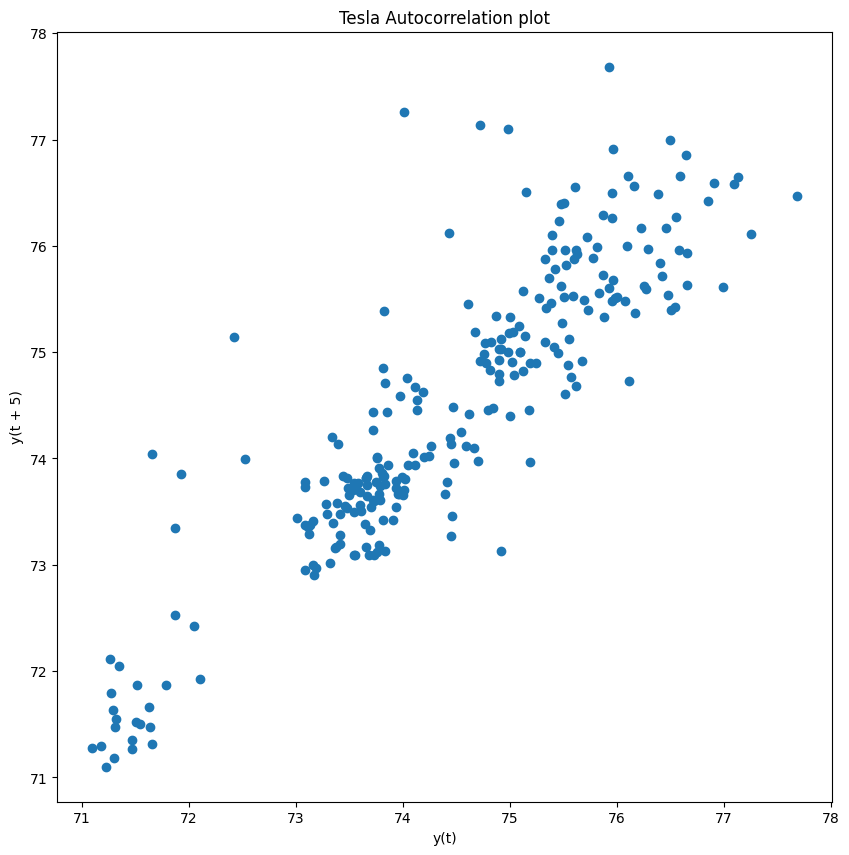

In [10]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')

#### ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction¶

In [11]:
df['Date'][250]

'2021-01-11'

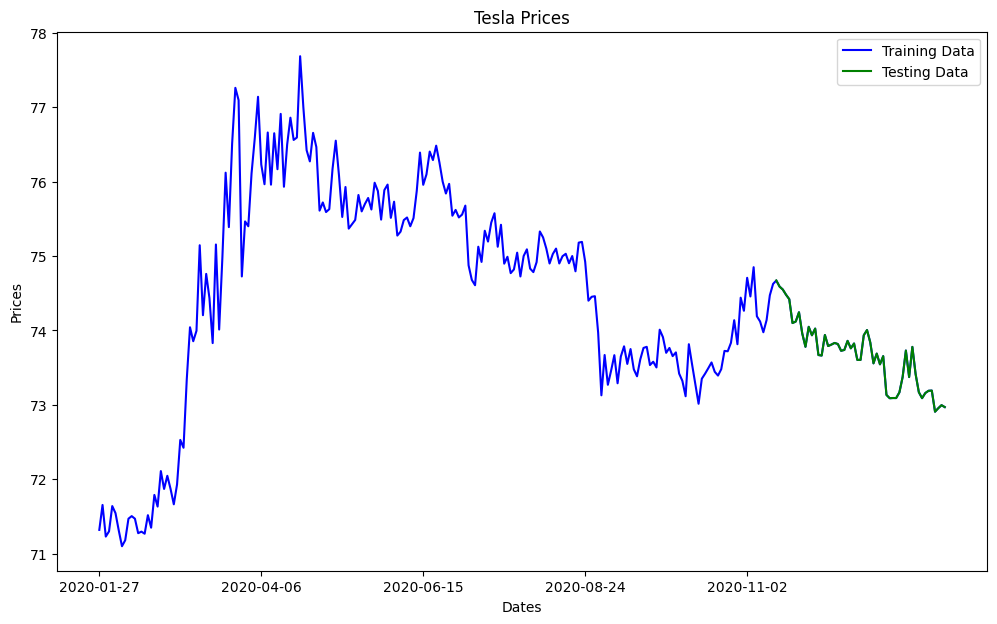

In [12]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,250, 50), df['Date'][0:250:50])
plt.legend()

In [13]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

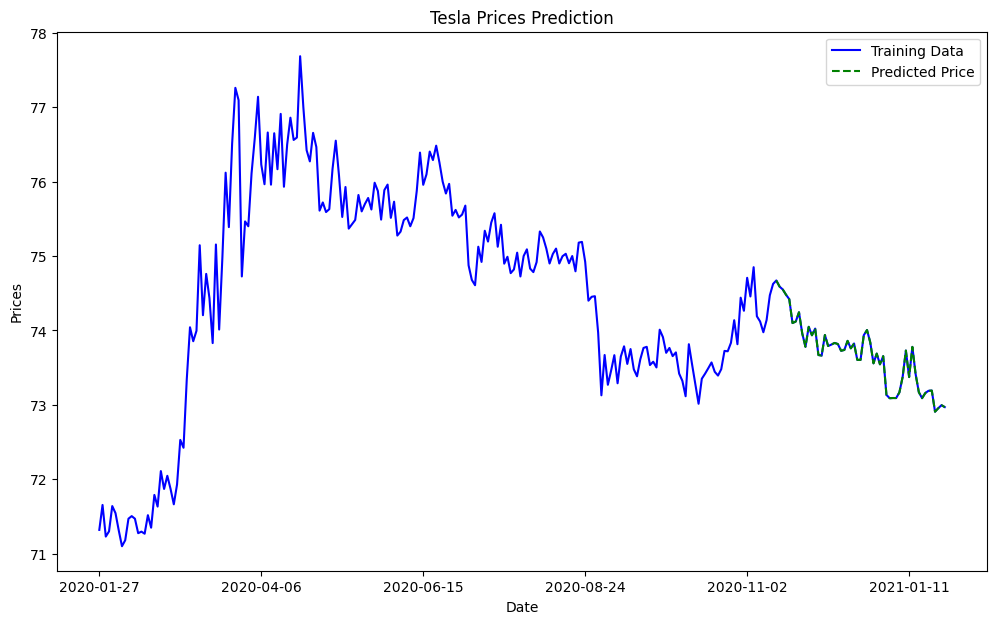

In [28]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [16]:
test_data['Date'][0:259:10]

209    2020-11-13
219    2020-11-27
229    2020-12-11
239    2020-12-25
249    2021-01-08
259    2021-01-22
Name: Date, dtype: object

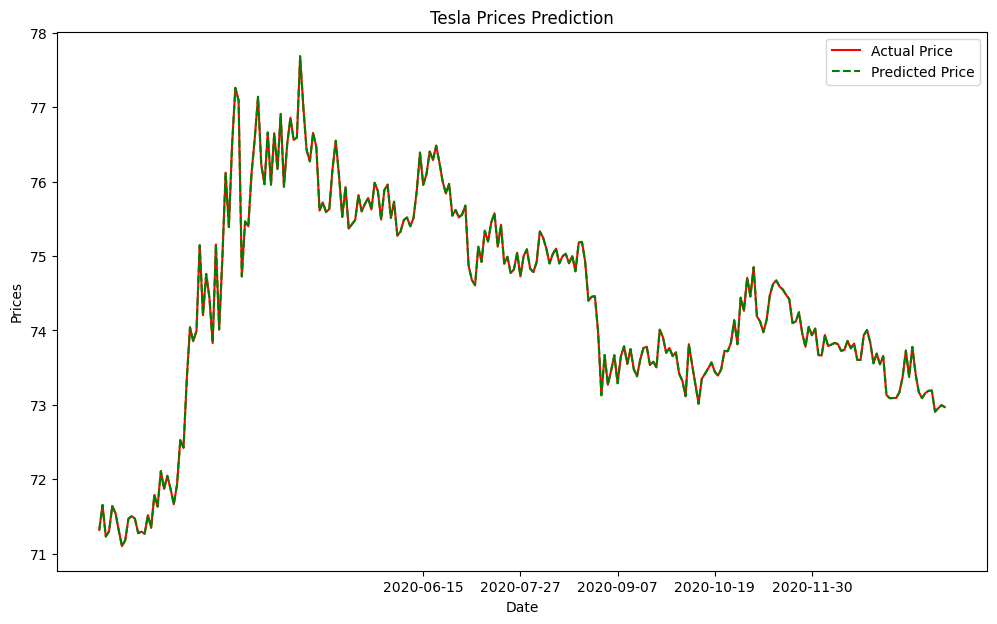

In [33]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()